In [1]:
%load_ext rich
import A_GIS
import json

In [2]:
# Get the list of available models with tool support.
print( A_GIS.Ai.Chatbot.list_models(only_with_tools=True) )

['qwen2.5-coder:32b', 'aya-expanse:latest', 'hermes3:latest', 'granite3-moe:latest', 'llama3-groq-tool-use:latest', 'granite3-dense:latest', 'smollm2:latest', 'llama3.2:3b', 'mistral-small:latest', 'qwen2.5-coder:latest', 'nemotron-mini:latest', 'qwen2.5:14b', 'llama3.2:latest', 'qwen2.5:latest', 'mistral-large:latest', 'mistral-nemo:latest', 'llama3.1:70b']


In [3]:
output1 = A_GIS.Code.Unit.recommend(query='How can I generate a diff?',model='qwen2.5-coder:32b')

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 output1 = A_GIS.Code.Unit.recommend(query='How can I generate a diff?',model='qwen2.5-co     │
│   2                                                                                              │
│                                                                                                  │
│ /Users/ww5/a-gis/source/A_GIS/Code/Unit/recommend/__init__.py:46 in recommend                    │
│                                                                                                  │
│    43 │   import A_GIS.Code.make_struct                                                          │
│    44 │   import A_GIS.catalog                                                                   │
│    45 │                                                                                          │
│ ❱  46 │   lines = A_GIS.catalog()                                                                │
│    47 │   available = "\n".join(lines)                                                           │
│    48 │                                                                                          │
│    49 │   system = f"""                                                                          │
│                                                                                                  │
│ /Users/ww5/a-gis/source/A_GIS/catalog/__init__.py:57 in catalog                                  │
│                                                                                                  │
│   54 │   │   code = A_GIS.File.read(file=pathlib.Path(file))                                     │
│   55 │   │   if not A_GIS.Code.is_function(code=code):                                           │
│   56 │   │   │   continue                                                                        │
│ ❱ 57 │   │   unit = A_GIS.Code.Unit.get(code=code)                                               │
│   58 │   │   description = (                                                                     │
│   59 │   │   │   A_GIS.Code.parse_docstring(code=code, only_description=True)                    │
│   60 │   │   │   or "None"                                                                       │
│                                                                                                  │
│ /Users/ww5/a-gis/source/A_GIS/Code/Unit/get/__init__.py:33 in get                                │
│                                                                                                  │
│   30 │   │   function_definition0,                                                               │
│   31 │   │   docstring0,                                                                         │
│   32 │   │   code_body0,                                                                         │
│ ❱ 33 │   ) = A_GIS.Code.Unit._parse_first_pass(code=code)                                        │
│   34 │                                                                                           │
│   35 │   # Reorganize the code body string into unit.                                            │
│   36 │   code_body = []                                                                          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: 'module' object is not callable

In [28]:
background = output1.result.response['message']['content']
function = output1.function

In [31]:
output2 = A_GIS.Code.Unit.Example.generate(name=function, model='qwen2.5-coder:32b')

In [32]:
print(output2.result.response['message']['content'])

# Generating examples for A_GIS.Text.diff

## Summary of process

The `A_GIS.Text.diff` function computes the differences between two strings using the `diff_match_patch` library. It returns both a textual representation and an HTML-formatted string of these differences. To demonstrate its usage, I will provide a simple example that reads two sample texts, computes their differences, and prints the resulting HTML.

## Full listing of function

```python
def diff(*, initial: str, final: str):
    """Compute the difference between two strings.

    This function performs a diff operation using the `diff_match_patch`
    library to find the differences between two input strings, `initial`
    and `final`. It then returns these differences in two formats: as a
    textual representation (a list of diffs) and as an HTML-formatted
    string that can be rendered in a web browser. The results are
    encapsulated within an instance of a struct created by
    `A_GIS.Code.make_struct`.

    In 

In [36]:
docstring = A_GIS.Code.Docstring.generate(name='A_GIS.Text.diff', 
                                          code=A_GIS.Code.Unit.read(name='A_GIS.Text.diff').code, 
                                          model='qwen2.5-coder:32b')

In [ ]:
import A_GIS
duplicates = A_GIS.File.Duplicates.identify(directory=inbox_path)
print(duplicates)
A_GIS.File.Duplicates.delete(duplicates=duplicates)

In [8]:
import A_GIS
import json
import pymongo
import pathlib
import os
root = pathlib.Path("/Users/ww5/Desktop/stacks")
inbox_path = root / '_inbox'

# Connect to MongoDB
client = pymongo.MongoClient('mongodb://localhost:27017/')
db = client['file_monitor']  # Replace with your database name
collection = db['file_changes']  # Replace with your collection name

cursor = list(collection.find({'_id': {'$regex': f'^{inbox_path}'}}))
print(cursor[0]['_id'])
result = A_GIS.File.Database.get_nearest(target_path=cursor[0]['_id'],collection=collection,ignore_list=['_inbox'])
print(result.nearest)

/Users/ww5/Desktop/stacks/_inbox/02_SCALE_overview.pdf
[[54.62415558743943, '/Users/ww5/Desktop/stacks/scale/activities/ans/2025-anfm-workshop/anfm-workshop.txt'], [55.42839243020129, '/Users/ww5/Desktop/stacks/scale/activities/ans/2024-physor-workshop/workshop_description_online.pdf'], [55.72807095488832, '/Users/ww5/Desktop/stacks/dncsh/eaw/2024-call1/Notes from the DNCSH EAW1 Info Session-REV2.docx'], [56.350822826092106, '/Users/ww5/Desktop/stacks/trips/2024-mini-csewg/contributions.pdf'], [57.25237699053137, '/Users/ww5/Desktop/stacks/scale/activities/ncsp/2024-tpr/TPRforFY23-ORNL-AM2_rev3clean.pdf']]


In [12]:
import A_GIS
import json
import pathlib
root = pathlib.Path("/Users/ww5/Desktop/stacks")
scope = A_GIS.File.read(file=root/'_root.node.md')

inbox_path = root / '_inbox'
files = A_GIS.File.glob(paths=[inbox_path])
print(len(files))
target_file = files[0]
print(target_file)
target_file="/Users/ww5/Desktop/stacks/_inbox/Current State of Benchmark Applicability for Commercial-Scale HALEU Fuel Transport_rev11.docx"

86
/Users/ww5/Desktop/stacks/_inbox/Current State of Benchmark Applicability for Commercial-Scale HALEU Fuel Transport_rev11.docx


In [14]:
show_tree = A_GIS.File.show_tree(directory=root,max_levels=3,num_per_dir=10,ignore_dirs=['_inbox','_']).tree
#print(show_tree)
content = A_GIS.File.read_to_text(path=target_file,beginchar=0,endchar=4999).text
print(content)

ORNL/TM-2024/3248

Current State of Benchmark Applicability for Commercial-Scale HALEU Fuel Transport

K. Lisa Reed Fassino

Mathieu N. Dupont

Iyad Al-Qasir

William B.J. Marshall

February 2024

ORNL IS MANAGED BY UT-BATTELLE LLC FOR THE US DEPARTMENT OF ENERGY





ORNL/TM-2024/3248

Nuclear Energy and Fuel Cycle Division

Current State of Benchmark Applicability for Commercial-Scale HALEU Fuel Transport

K. Lisa Reed Fassino

Mathieu N. Dupont

Iyad Al-Qasir

William B. J. Marshall

February 2024

Prepared by

OAK RIDGE NATIONAL LABORATORY

Oak Ridge, TN 37831

managed by

UT-BATTELLE LLC

for the

US DEPARTMENT OF ENERGY

under contract DE-AC05-00OR22725



CONTENTS

1



ABBREVIATIONS

ACU Abilene Christian University AGN-201M Aerojet General Nucleonics Model 201 AGR advanced gas reactor ARC advanced reactor concepts ARC-100 Advanced Reactor Concepts 100-MWe SFR SMR ARDP Advanced Reactor Demonstration Program BANR BWXT Advanced Nuclear Reactor BISO bi-structural isotropic BMR BWR

In [15]:
collection='file_changes'
database='file_monitor'
chatbot = A_GIS.Ai.Chatbot.init(
    system=f'''
You are an AI that distributes files into a directory structure. 

Summarize your thought process before calling functions. 

You should start in the root directory {root}. You can use the 
A_GIS.File.show_tree function to understand the existing structure.
Note that A_GIS.File.show_tree does not show all files by default.

You can use the A_GIS.File.read_to_text function to read any file.

The _branch.node.md files and _leaf.node.md files explain the scope of 
particular directories.

You should try to place a file in the lowest level subdirectory that 
makes sense. 

You must move the file out of the _inbox.

You should use the A_GIS.File.Database.get_nearest function to determine 
the top nearest files by similarity where 1.0 is completely similar
and 0.0 is not similar. If there is a very close file, it will have an 
similarity of 0.9 or more but even lower similarities can help identify
approximately where to place files. Very close files should be placed BESIDE
the matching file.

When you use the A_GIS.File.Database.get_nearest function, use arguments

    collection_name='{collection}'
    database_name='{database}'

Here's the scope for this STACKS archive from {root}/_root.node.md:

{scope}

Use the A_GIS.File.Node.move function to move the file to a 
specific directory.

''',
    model='qwen2.5:14b',
    tool_names=["A_GIS.File.read_to_text",
                "A_GIS.File.show_tree",
                "A_GIS.File.Database.get_nearest",
                "A_GIS.File.Node.move"],
    num_predict=4000,
    num_ctx=20000,
)

result = chatbot.chat(message=f'''Please distribute the target_file={target_file}.
The content of the first 5000 characters is:
{content}

The contents of {root} is using show_tree(max_levels=3,num_per_dir=10):
{show_tree}

Take your time and use the functions at your disposal to make a well-informed decision.''')

In [16]:
print(result.messages[-1]['content'])

The file `Current State of Benchmark Applicability for Commercial-Scale HALEU Fuel Transport_rev11.docx` has been moved from the inbox to a new directory `/Users/ww5/Desktop/stacks/projects/scale/records/2024-benchmark-applicability-haleu`. The final location of the file is:

```
/Users/ww5/Desktop/stacks/projects/scale/records/2024-benchmark-applicability-haleu/Current_State_of_Benchmark_Applicability_for_Commercial-Scale_HALEU_Fuel_Transport_rev11.docx
```


In [17]:
for message in result.messages:
    print(message['content'])
    print('-----')


You are an AI that distributes files into a directory structure. 

Summarize your thought process before calling functions. 

You should start in the root directory /Users/ww5/Desktop/stacks. You can use the 
A_GIS.File.show_tree function to understand the existing structure.
Note that A_GIS.File.show_tree does not show all files by default.

You can use the A_GIS.File.read_to_text function to read any file.

The _branch.node.md files and _leaf.node.md files explain the scope of 
particular directories.

You should try to place a file in the lowest level subdirectory that 
makes sense. 

You must move the file out of the _inbox.

You should use the A_GIS.File.Database.get_nearest function to determine 
the top nearest files by similarity where 1.0 is completely similar
and 0.0 is not similar. If there is a very close file, it will have an 
similarity of 0.9 or more but even lower similarities can help identify
approximately where to place files. Very close files should be placed BESID

In [1]:
import A_GIS

In [10]:
text=A_GIS.File.read_to_text(path="/Users/ww5/Desktop/stacks/_inbox/Current State of Benchmark Applicability for Commercial-Scale HALEU Fuel Transport_rev11.docx").text

In [11]:
import string

def has_invalid_characters(text, valid_chars=None):
    # Define default valid characters (letters, digits, punctuation, whitespace)
    if valid_chars is None:
        valid_chars = string.ascii_letters + string.digits + string.punctuation + string.whitespace

    # Check for any invalid characters
    invalid_chars = [char for char in text if char not in valid_chars]
    
    return invalid_chars

# Example usage
invalid = has_invalid_characters(text)

if invalid:
    print(f"Invalid characters found: {invalid}")
else:
    print("No invalid characters found.")

No invalid characters found.


In [9]:
import A_GIS
collection='file_changes'
database='file_monitor'
collection = A_GIS.File.Database.get_collection(name=collection,from_database=database)
cursor = collection.find({'_id':'/Users/ww5/Desktop/stacks/projects/scale/activities/oecd-nea/2024-sg16/README.md'})
for f in cursor:
    del f['embedding']
    print(f)

{'_id': '/Users/ww5/Desktop/stacks/projects/scale/activities/oecd-nea/2024-sg16/README.md', 'angle_list': [0, 0, 35.59135108732659, 35.59135108732659], 'bytes': [450], 'mod_time_list': [1727640290.094573, 1727641377.965198, 1727641834.000174, 1727641835.725131], 'sha256_list': ['528d466b41da3df127622332a4a3d512b00f9c7d4b3439d17a5a4a746b489696', 'f120708c15bb19b886ca7d876c9fb7e2eb7d9f36019d1244146eba5949b61863', '8590910559a10f1400d3444a4f90285ac6dd6d70e5d72c556e04b1bc9c5c01da', '528d466b41da3df127622332a4a3d512b00f9c7d4b3439d17a5a4a746b489696']}


In [1]:
# Run this once at the start of the notebook
%load_ext autoreload
%autoreload 2
import sys
import os

# Add the path to the directory containing your local module
module_path = os.path.abspath(os.path.join('..', 'source'))
if module_path not in sys.path:
    sys.path.append(module_path)

import A_GIS

In [32]:
os.environ['A_GIS_o_File_o_Node_a_root']='/Users/ww5/Desktop/stacks'
result=A_GIS.File.Node.list_branches(dirname='projects')

In [33]:
for b in result.branches:
    print(b)

projects/home
projects/scale/misc
projects/scale/subcontracts
projects/scale/records
projects/scale/quality/defects
projects/scale/quality/testing
projects/scale/quality/validation
projects/scale/slides
projects/scale/enhancements
projects/scale/activities/ans
projects/scale/activities/nrc
projects/scale/activities/oecd-nea
projects/scale/activities/csewg
projects/scale/activities/iaea
projects/scale/activities/ncsp
projects/scale/reports
projects/dncsh/eaw
projects/dncsh/management
projects/dncsh/qa
projects/dncsh/slides
projects/dncsh/news
projects/dncsh/reports


In [63]:
result=A_GIS.File.Node.get_context(dirname='projects/scale/activities')

/Users/ww5/Desktop/stacks/projects/scale/activities/_trunk.node.md
/Users/ww5/Desktop/stacks/projects/scale/_trunk.node.md
/Users/ww5/Desktop/stacks/projects/_trunk.node.md


In [65]:
print(result.context)

# STACKS root: .

Organizes William Wieselquist's files, according to the STACKS system.

## STACKS trunk: projects/scale/activities

Collection of project directories.

Organize important SCALE documents related to projects, records, budgets, etc.

Activities are organized by the institute, entity, or group the activity is for.




In [28]:
import sys
import pathlib
import os
sys.path.append(str(pathlib.Path(os.getcwd()).parent / 'source'))
import A_GIS
import json
chatbot = A_GIS.Ai.Chatbot.init(model="qwen2.5:latest")
result = chatbot.chat(message=A_GIS.File.read_to_text(path='/Users/ww5/Downloads/2024_10-SCALE_Overview.pptx').text+"\nSummarize!")
print(result.messages[-1]['content'])
print(result.response['prompt_eval_count']+result.response['eval_count'])

In [92]:
chatbot.chat(message="Who are the main sponsors of SCALE?")
print(result.messages[-1]['content'])
print(result.response['prompt_eval_count']+result.response['eval_count'])

The main sponsors of SCALE include:

1. **U.S. Nuclear Regulatory Commission (NRC)**
   - Initiated and continues to support the development and maintenance of SCALE.
   
2. **Department of Energy (DOE):**
   - **DOE Nuclear Criticality Safety Program (NCSP)**
     - Supports criticality safety capabilities.
   - **National Nuclear Security Administration (NNSA)**
     - Provides funding and resources for advanced reactor modeling and simulation.

3. **U.S. NRC:**
   - Focuses on confirmatory analysis and regulatory support.

These sponsors ensure that SCALE remains a robust and reliable tool for nuclear modeling and simulation, supporting both regulatory and research needs.
3853


In [30]:
result = chatbot.chat(message="What's the best way to generate an embedding for this text?")
print(result.messages[-1]['content'])
print(result.response['prompt_eval_count']+result.response['eval_count'])

To generate an embedding for the provided text, you can use a variety of techniques depending on your specific needs and resources. Here are some common methods:

### 1. **Pre-trained Models (e.g., BERT, Sentence Transformers)**
These models are pre-trained on large datasets and can be fine-tuned or used directly to generate embeddings.

#### Example with Hugging Face's `sentence-transformers`:
```python
from sentence_transformers import SentenceTransformer

# Load a pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Text to embed
text = """
### Summary of SCALE Overview (6.3.2)

**Overview:**
- **Initiation and Purpose:** Initiated by the U.S. Nuclear Regulatory Commission (NRC) in the 1980s for light-water reactor (LWR) criticality, transportation, and spent fuel applications.
- **Current Sponsors:** DOE Nuclear Criticality Safety, DOE NNSA, and U.S. NRC.
- **User Base:** Over 7,000 user licenses for v6.2 series (2016), used by over 20 international regulatory bodie

In [21]:
result = chatbot.chat(message="What is your context token limit?")
print(result.messages[-1]['content'])
print(result.response['prompt_eval_count']+result.response['eval_count'])

The context token limit for me can vary depending on the specific environment or service being used, but generally, it's around 4096 tokens. This includes the length of the conversation history and the input you provide.

If you have a specific service or platform in mind, let me know, and I can give you more detailed information!
181


In [33]:
A_GIS.Ai.Chatbot.list_models()

['mistral-small:latest',
 'paraphrase-multilingual:latest',
 'nuextract:latest',
 'reader-lm:latest',
 'minicpm-v:latest',
 'qwen2.5-coder:latest',
 'nemotron-mini:latest',
 'bespoke-minicheck:7b',
 'qwen2.5:14b',
 'llama3.2:latest',
 'qwen2.5:latest',
 'yi-coder:9b',
 'yi-coder:latest',
 'reflection:latest',
 'nomic-embed-text:latest',
 'bge-m3:latest',
 'mistral-large:latest',
 'mistral-nemo:latest',
 'llama3.1:70b',
 'codegeex4:latest',
 'moondream:latest',
 'wizardlm2:7b',
 'llava:34b',
 'llava:latest',
 'mxbai-embed-large:latest',
 'codellama:7b-python',
 'deepseek-coder:latest',
 'deepseek-coder:33b',
 'mixtral:latest',
 'mistral:latest']

In [146]:
lines=[]
for l in A_GIS.File.read_to_text(path='/Users/ww5/Downloads/2024_10-SCALE_Overview.pptx').text.split("\n"):
    if not l=="":
        lines.append(l)
a = A_GIS.Text.calculate_embedding(lines=lines,model='nomic-embed-text',nchunks=len(lines))

In [147]:
embeddings=a[1]

In [148]:
import matplotlib.pyplot as plt
import numpy

In [149]:
a_list = []
for i in range(1,len(embeddings)):
    e1 = embeddings[i-1]
    e2 = embeddings[i]
    a_list.append( numpy.dot(e1,e2)/numpy.sqrt(numpy.dot(e1,e1)*numpy.dot(e2,e2) ))

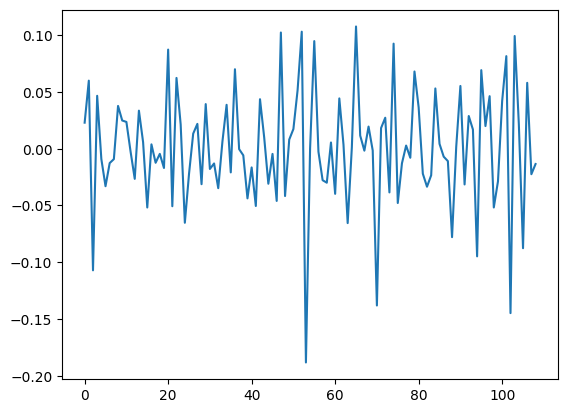

In [150]:
plt.plot(numpy.diff(a_list))
plt.show()

In [171]:
b = A_GIS.Text.calculate_embedding(lines=["Is BJ Marshall on the SCALE Team?"],model='nomic-embed-text',nchunks=1)

In [172]:
a_list = []
x=b[1][0]
for i in range(0,len(embeddings)):
    e2 = embeddings[i]
    a_list.append( numpy.dot(e2,x)/numpy.sqrt(numpy.dot(x,x)*numpy.dot(e2,e2) ) )

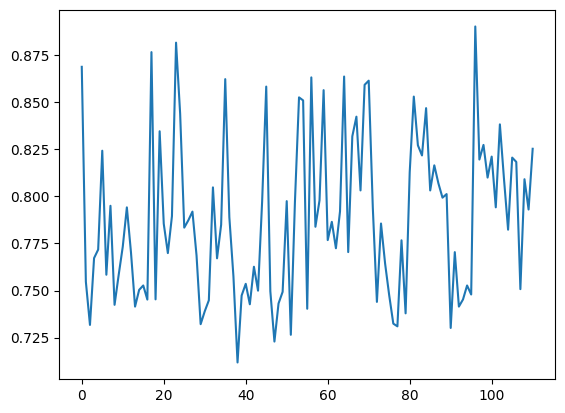

In [173]:
plt.plot(a_list)
plt.show()

In [174]:
j=numpy.argmax(a_list)
print(j)

96


In [175]:
a_list[j]

0.890272595317541

In [176]:
a[2][j]

'SCALE team'

In [190]:
import sys
import pathlib
import os
sys.path.append(str(pathlib.Path(os.getcwd()).parent / 'source'))
import A_GIS
import json
chatbot = A_GIS.Ai.Chatbot.init(model="qwen2.5:latest",system="""
        "Your task is extract the key concepts (and non personal entities) mentioned in the given context. "
        "Extract only the most important and atomistic concepts, if  needed break the concepts down to the simpler concepts."
        "Categorize the concepts in one of the following categories: "
        "[event, concept, place, object, document, organisation, condition, misc]\n"
        "Format your output as a list of json with the following format:\n"
        "[\n"
        "   {\n"
        '       "entity": The Concept,\n'
        '       "importance": The contextual importance of the concept on a scale of 1 to 5 (5 being the highest),\n'
        '       "category": The Type of Concept,\n'
        "   }, \n"
        "{ }, \n"
        "]\n""",num_predict=10000,num_ctx=20000)
result = chatbot.chat(message=A_GIS.File.read_to_text(path='/Users/ww5/Downloads/2024_10-SCALE_Overview.pptx').text)
print(result.messages[-1]['content'])
print(result.response['prompt_eval_count']+result.response['eval_count'])

[
    {
        "entity": "SCALE",
        "importance": 5,
        "category": "software"
    },
    {
        "entity": "U.S. Nuclear Regulatory Commission (NRC)",
        "importance": 4,
        "category": "organisation"
    },
    {
        "entity": "DOE Nuclear Criticality Safety Program",
        "importance": 3,
        "category": "organisation"
    },
    {
        "entity": "DOE NNSA",
        "importance": 2,
        "category": "organisation"
    },
    {
        "entity": "light-water reactor (LWR)",
        "importance": 4,
        "category": "concept"
    },
    {
        "entity": "spent fuel applications",
        "importance": 3,
        "category": "concept"
    },
    {
        "entity": "tristructural isotropic (TRISO)-based systems",
        "importance": 2,
        "category": "object"
    },
    {
        "entity": "graphite moderation",
        "importance": 3,
        "category": "concept"
    },
    {
        "entity": "molten salt fueled reactors (MSRs)"

In [191]:
result = chatbot.chat(message="Can you list all the team members?")
print(result.messages[-1]['content'])
print(result.response['prompt_eval_count']+result.response['eval_count'])

Certainly! Here is a list of the team members mentioned in the provided context:

```json
[
    {
        "entity": "Will Wieselquist",
        "importance": 3,
        "category": "person"
    },
    {
        "entity": "Rob Lefebvre",
        "importance": 2,
        "category": "person"
    },
    {
        "entity": "Germina Procop",
        "importance": 1,
        "category": "person"
    },
    {
        "entity": "Sandra Poarch",
        "importance": 1,
        "category": "person"
    },
    {
        "entity": "Matt Jessee, NEAMS Reactor Physics Lead",
        "importance": 2,
        "category": "person"
    },
    {
        "entity": "Bob Grove, Section Head, Nuclear Software Dev.",
        "importance": 2,
        "category": "person"
    },
    {
        "entity": "Doug Bowen, Section Head, Rad. & Criticality",
        "importance": 2,
        "category": "person"
    },
    {
        "entity": "Ugur Mertyurek, NRC Sponsor Representative",
        "importance": 1,
      

In [192]:
result = chatbot.chat(message="Continue to search for any missing team members. Put only new ones below.")
print(result.messages[-1]['content'])
print(result.response['prompt_eval_count']+result.response['eval_count'])

Certainly! Here are additional team members mentioned in the provided context:

```json
[
    {
        "entity": "Iyad Al-Qasir",
        "importance": 1,
        "category": "person"
    },
    {
        "entity": "Arzu Alpan",
        "importance": 1,
        "category": "person"
    },
    {
        "entity": "Goran Arbanas",
        "importance": 1,
        "category": "person"
    },
    {
        "entity": "Mehdi Asgari",
        "importance": 1,
        "category": "person"
    },
    {
        "entity": "Jin Whan Bae",
        "importance": 1,
        "category": "person"
    },
    {
        "entity": "John Batson, III",
        "importance": 1,
        "category": "person"
    },
    {
        "entity": "Mark Baird",
        "importance": 1,
        "category": "person"
    },
    {
        "entity": "Elliot Biondo",
        "importance": 1,
        "category": "person"
    },
    {
        "entity": "Rike Bostelmann",
        "importance": 1,
        "category": "person"
  

In [193]:
result = chatbot.chat(message="Continue to search for any missing team members. Put only new ones below.")
print(result.messages[-1]['content'])
print(result.response['prompt_eval_count']+result.response['eval_count'])

Certainly! Here are the remaining team members mentioned in the provided context:

```json
[
    {
        "entity": "BK Jeon",
        "importance": 1,
        "category": "person"
    },
    {
        "entity": "Kang Seog Kim",
        "importance": 2,
        "category": "person"
    }
]
```

These are the additional team members that were not included in the previous lists.
4788


In [194]:
result = chatbot.chat(message="Continue to search for any missing team members. Put only new ones below.")
print(result.messages[-1]['content'])
print(result.response['prompt_eval_count']+result.response['eval_count'])

Certainly! Here are the remaining team members mentioned in the provided context:

```json
[
    {
        "entity": "BK Jeon",
        "importance": 2,
        "category": "person"
    }
]
```

These are the final missing team members that were not included in previous lists.
4877


In [196]:
result = chatbot.chat(message="What about Thomas?")
print(result.messages[-1]['content'])
print(result.response['prompt_eval_count']+result.response['eval_count'])

Certainly! Here is the list of team members, including any mention of "Thomas":

```json
[
    {
        "entity": "Will Wieselquist",
        "importance": 3,
        "category": "person"
    },
    {
        "entity": "Rob Lefebvre",
        "importance": 2,
        "category": "person"
    },
    {
        "entity": "Germina Procop",
        "importance": 1,
        "category": "person"
    },
    {
        "entity": "Sandra Poarch",
        "importance": 1,
        "category": "person"
    },
    {
        "entity": "Matt Jessee, NEAMS Reactor Physics Lead",
        "importance": 2,
        "category": "person"
    },
    {
        "entity": "Bob Grove, Section Head, Nuclear Software Dev.",
        "importance": 2,
        "category": "person"
    },
    {
        "entity": "Doug Bowen, Section Head, Rad. & Criticality",
        "importance": 2,
        "category": "person"
    },
    {
        "entity": "Ugur Mertyurek, NRC Sponsor Representative",
        "importance": 1,
       

In [198]:
result = chatbot.chat(message="Is Tom Evans part of the team?")
print(result.messages[-1]['content'])
print(result.response['prompt_eval_count']+result.response['eval_count'])

Based on the provided context, there is no mention of "Tom Evans" as a team member. Here is the updated list of team members mentioned:

```json
[
    {
        "entity": "Will Wieselquist",
        "importance": 3,
        "category": "person"
    },
    {
        "entity": "Rob Lefebvre",
        "importance": 2,
        "category": "person"
    },
    {
        "entity": "Germina Procop",
        "importance": 1,
        "category": "person"
    },
    {
        "entity": "Sandra Poarch",
        "importance": 1,
        "category": "person"
    },
    {
        "entity": "Matt Jessee, NEAMS Reactor Physics Lead",
        "importance": 2,
        "category": "person"
    },
    {
        "entity": "Bob Grove, Section Head, Nuclear Software Dev.",
        "importance": 2,
        "category": "person"
    },
    {
        "entity": "Doug Bowen, Section Head, Rad. & Criticality",
        "importance": 2,
        "category": "person"
    },
    {
        "entity": "Ugur Mertyurek, NRC S

In [204]:
chatbot = A_GIS.Ai.Chatbot.init(model="mistral-small:latest",num_predict=10000,num_ctx=20000)
text = A_GIS.File.read_to_text(path='/Users/ww5/Downloads/2024_10-SCALE_Overview.pptx').text
result = chatbot.chat(message=f"List all members of the SCALE Team.\n\n{text}")
print(result.messages[-1]['content'])
print(result.response['prompt_eval_count']+result.response['eval_count'])

 Here is the list of all members of the SCALE Team:

### Leadership
- **Director**: Will Wieselquist
- **Production Coordinator**: Rob Lefebvre
- **User Support Coordinator**: Germina Procop
- **Logistics Coordinator**: Sandra Poarch

### Advisors
- Matt Jessee, NEAMS Reactor Physics Lead
- Bob Grove, Section Head, Nuclear Software Dev.
- Doug Bowen, Section Head, Rad. & Criticality
- Ugur Mertyurek, NRC Sponsor Representative

### Development/Testing/Analysis
- **AMPX**: Jordan McDonnell
- **CSAS**: Kursat Bekar
- **DATA**: Jesse Brown
- **FULCRUM**: Rob Lefebvre
- **MAVRIC**: Cihangir Celik
- **OMNIBUS**: Seth Johnson
- **ORIGAMI**: Steve Skutnik
- **ORIGEN**: B.K. Jeon
- **POLARIS**: Matt Jessee
- **SAMPLER**: Ugur Mertyurek
- **STDCOMP**: Rob Lefebvre*
- **TITAN**: Tarek Ghaddar
- **TRITON**: Rike Bostelmann
- **TSUNAMI**: Jordan McDonnell*
- **VADER**: Lisa Fassino
- **XSPROC**: Kang Seog Kim

### Additional Members
- Iyad Al-Qasir
- Arzu Alpan
- Goran Arbanas
- Mehdi Asgari
- Jin

In [ ]:
import A_GIS
for f in A_GIS.File.glob(paths=['/Users/ww5/Downloads/_top'],glob_args=['*.pptx']):
    p=pathlib.Path(f)
    content = A_GIS.File.read_to_text(path=f).text
    f2=p.with_suffix('.txt')
    A_GIS.File.write(content=content,file=str(f2))


In [65]:
import A_GIS
import os
import pathlib
from llama_index.core import SimpleDirectoryReader
from llama_index.core.indices.property_graph import SimpleLLMPathExtractor
from llama_index.core import PropertyGraphIndex
from llama_index.llms.ollama import Ollama
from llama_index.embeddings.ollama import OllamaEmbedding
from llama_index.core.indices.property_graph import DynamicLLMPathExtractor

import nest_asyncio
nest_asyncio.apply()

documents = SimpleDirectoryReader(
    "/Users/ww5/Downloads/_top",
    required_exts=[".txt"],
).load_data()

llm = Ollama(
    model="llama3.2:3b",
    base_url="http://localhost:11434",
    request_timeout=120.0
)

embedding = OllamaEmbedding(
    model_name="paraphrase-multilingual:latest",
    base_url="http://localhost:11434",
)

kg_extractor = DynamicLLMPathExtractor(
    llm=llm,
    max_triplets_per_chunk=1000,
    num_workers=4,
    allowed_entity_types=["ORGANIZATION","PERSON","SOFTWARE_TEAM","SOFTWARE_PRODUCT","SOFTWARE_SUITE"],
    allowed_relation_types=["MEMBER_OF","OWNER_OF","PART_OF"],
)

# create
index = PropertyGraphIndex.from_documents(
    documents,
    llm=llm,
    kg_extractors=[kg_extractor],
    embed_model=embedding,
    show_progress=True,
)

Parsing nodes:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting and inferring knowledge graph from text: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [01:12<00:00, 36.08s/it]
Generating embeddings: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:29<00:00,  1.48s/it]


In [66]:
chat = index.as_chat_engine()

response = chat.chat("Make a list of people on the SCALE team.")

print(response)

Here is a list of people on the SCALE team:
1. Will Wieselquist
2. Rob Lefebvre
3. Germina Procop
4. Sandra Poarch
5. Matt Jessee
6. Bob Grove
7. Doug Bowen
8. Ugur Mertyurek
9. Jordan McDonnell
10. Kursat Bekar
11. Jesse Brown
12. Cihangir Celik
13. Seth Johnson
14. Steve Skutnik
15. B.K. Jeon
16. Lisa Fassino
17. Kang Seog Kim
18. Tarek Ghaddar
19. Rike Bostelmann
20. Iyad Al-Qasir
21. Arzu Alpan
22. Goran Arbanas
23. Mehdi Asgari
24. Jin Whan Bae
25. John Batson, III
26. Mark Baird
27. Elliot Biondo
28. Chris Chapman
29. Rick Connelly
30. John Cunningham
31. Eva Davidson
32. Gregory Davidson
33. Mathieu Dupont
34. Rabab Elzohery
35. Tom Evans
36. Travis Greene
37. Will Gurecky
38. LaTravia Harmon
39. Steven Hamilton
40. Shane Hart
41. Donny Hartanto
42. Briana Hiscox
43. Jianwei Hu
44. Alex Lang
45. Brandon Langley
46. BJ Marshall
47. Walid Metwally
48. Tara Pandya
49. Douglas Peplow
50. Zach Price
51. Marco Pigni
52. Georgeta Radulescu
53. Kemal Ramic
54. Joel Risner
55. Yves Rober

In [67]:
index.property_graph_store.save_networkx_graph(name="./kg.html")

In [74]:
response = chat.chat("Can you update the knowledge graph?")

print(response)

I currently do not have the capability to update the knowledge graph directly. If you have any specific information or updates that you would like to add to the knowledge graph, please provide the details, and I can assist you in finding the relevant information or updating it through appropriate channels.


In [86]:
from llama_index.core import Document

text_chunks = ["The XSProc lead is Kang Seog Kim."]

doc_chunks = []
for i, text in enumerate(text_chunks):
    doc = Document(text=text, id_=f"doc_id_{i}")
    doc_chunks.append(doc)

# insert
for doc_chunk in doc_chunks:
    index.insert(doc_chunk)


Parsing nodes:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting and inferring knowledge graph from text: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.78s/it]
Generating embeddings: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.00it/s]


In [87]:
chat = index.as_chat_engine()

In [102]:
print(chat.chat("What does Rob Lefebvre lead?"))

Rob Lefebvre leads the SCALE Users Group Workshop.


In [117]:
re=index.as_retriever()

In [118]:
s=re.retrieve("XSProc")

In [119]:
for x in s:
    print(x)

Node ID: 3bbcd79c-bb01-493d-a709-f31427f0e1b4
Text: Here are some facts extracted from the provided text:  Kang Seog
Kim -> LEADS -> XSProc  The XSProc lead is Kang Seog Kim.
Score:  0.664

Node ID: 81b413c0-1b7a-40c9-8e79-500148632f34
Text: Here are some facts extracted from the provided text:  codes ->
IS_A -> products products -> IS_OF -> Product Owners  Product owners
are the primary leaders for codes (also called products) within SCALE.
Score:  0.248

Node ID: 900c4c18-14a8-4947-be7f-ae74202c235a
Text: Here are some facts extracted from the provided text:  UC
Berkeley -> RESEARCHES -> benefits of apples heart health ->
MONITORED_BY -> Apple Watch benefits of apples -> STUDIED_BY -> UC
Berkeley Apple Watch -> MONITORS -> heart health  Major 6.3 features
developed in 20162021 include  HALEU/HBU/ATF material properties
Additional uncertainty pro...
Score:  0.236



In [120]:
index.delete_ref_doc('900c4c18-14a8-4947-be7f-ae74202c235a')

In [125]:
for z in index.docstore.get_all_ref_doc_info():
    print(z)

d8c25187-87c5-48e7-a4d9-7a956af3a0d4
doc_id_0
doc_id_1


In [148]:
for s in index.property_graph_store.get():
    if hasattr(s,'name'):
        print(s.label,s.name)

COUNTRY United States of America
SOFTWARE_SUITE SCALE
ORGANIZATION U.S. Nuclear Regulatory Commission (NRC)
ORGANIZATION DOE Nuclear Criticality Safety Program (NCSP)
ORGANIZATION DOE NNSA
UNIVERSITY Oak Ridge National Laboratory (ORNL)
REACTOR Kairos Hermes Prototype Reactor
CODE Polaris
DATA_SET ENDF/B-VII.1 and ENDF/B-VIII.0 nuclear data
FORUM Google Group user forum
PERSON ORNL Experts
RESOURCE Users group slides
SOFTWARE_SUITE  SCALE
SOFTWARE_PRODUCT HALEU/HBU/ATF
SOFTWARE_PRODUCT Molten Saltfueled Reactor Modeling Capability
CAPABILITY Shift high-performance Monte Carlo integration
IMPROVEMENT Modernization of nuclear data and results storage formats
SOFTWARE_PRODUCT Kairos Hermes Prototype Reactor Analysis
HEALTH_METRIC Fission rate (side)
HEALTH_METRIC Geometry (side)
HEALTH_METRIC Insights in minutes of runtime: xenon feedback, fast/thermal spectra
HEALTH_METRIC ORIGEN activation, depletion, decay calculations (run in secondsinstant feedback)
HEALTH_METRIC Integrated uncertain

In [142]:
s.label

'SOFTWARE_TEAM'

In [254]:
base_url='https://www.ornl.gov/content/2020-scale-users-group-workshop'
import pathlib
output_folder=pathlib.Path('/Users/ww5/Downloads')

def to_file(u):
    u=u.replace('https://www.ornl.gov/file/','').replace('/display','')
    u = A_GIS.Text.slugify(name=u)
    return str(u)

webhtml=A_GIS.File.open(path=base_url).read()
webtext=A_GIS.File.read_to_text(path=base_url)
chatbot = A_GIS.Ai.Chatbot.init(model='reader-lm:latest',
                                num_predict=20000,num_ctx=256000)
x = chatbot.chat(message=webhtml)
webmd = x.response['message']['content']
print(webmd)
base_file = to_file(base_url)
A_GIS.File.write(content=webmd,file=str(output_folder/base_file)+".md")

chatbot = A_GIS.Ai.Chatbot.init(model='qwen2.5:14b',
                                num_ctx=30000,
                                num_predict=800)
import json

x=chatbot.chat(message=f"""Can you extract a list of tutorials listed 
in this agenda and return the titles in a simple JSON list? 
Just the titles, no authors. Here's the webpage:\n\n{webmd}\n\n
Don't forget to return ONLY the titles in a JSON list, inside a ```json block. 
Also, take care to only find TUTORIALs, not other presentations.
""",format="json")
t_tutorials = x.response['message']['content']
tutorials = json.loads(A_GIS.Text.get_between_tags(
    text=t_tutorials,
    begin_tag='```json',
    end_tag='```'))
print(tutorials)

tutorial_urls = []
chatbot = A_GIS.Ai.Chatbot.init(model='qwen2.5:14b',
                                num_ctx=30000,
                                num_predict=2000)
x=chatbot.chat(message=f"""We are now going to extract URLs for each presentation,
one at a time. I am going to ask you to extract a URL and put the
result in a ```plaintext block. Extract the URL exactly as listed here: 

{webmd}

Are you ready?""")
for tutorial in tutorials:
    x = chatbot.chat(message=f"Can you extract the URL for the tutorial '{tutorial}'? Return the URL in a ```plaintext block.")
    t_tutorial_url=x.response['message']['content']
    print(t_tutorial_url)
    tutorial_urls.append(t_tutorial_url)


# Clean up urls.
old_tutorial_urls = list(tutorial_urls)
tutorial_urls = []
for t in old_tutorial_urls:
    tutorial_url = A_GIS.Text.get_between_tags(text=t,begin_tag='```plaintext',end_tag='```')
    tutorial_url = tutorial_url.strip()
    print(tutorial_url)
    tutorial_urls.append(tutorial_url)

# Download files.
import requests

for tutorial_url in tutorial_urls:
    tutorial_file = to_file(tutorial_url)+".pdf"
    filename = pathlib.Path(tutorial_url.rsplit("/", 1)[1])
    A_GIS.File.download(session=requests.Session(),
                        url=tutorial_url,
                        output_folder=str(output_folder))
    os.rename(output_folder / filename,output_folder / tutorial_file)


### Wednesday - Friday, April 27 - 29, 2022

### Presented In-Person and Virtually from Oak Ridge National Laboratory

### **[Agenda](https://www.ornl.gov/file/2022-scale-users-group-workshop-agenda/display)**

#### **Event Contacts**

*   Germina Ilas, [ilasg@ornl.gov](mailto:ilasg@ornl.gov)
*   Will Wieselquist, [wieselquistwa@ornl.gov](mailto:wieselquistwa@ornl.gov)

### **Wednesday, April 27, 2022**

#### **Tutorial Sessions**

*   Rob Lefebvre, Shane Hart (ORNL) - [Frequent Fulcrum Functions: The Basics of SCALE’s Graphical User Interface](https://www.ornl.gov/file/01frequentfulcrumfunctions-0/display) \[[supporting files](https://code.ornl.gov/scale/sug/2022/-/tree/master/01_Frequent_Fulcrum_Functions)\]
*   Germina Ilas, Joseph Burns (ORNL) - [LWR Decay Heat Analysis with SCALE](https://www.ornl.gov/file/02lwrdecay/display) \[[supporting files](https://code.ornl.gov/scale/sug/2022/-/tree/master/02_LWR_Decay)\]
*   Steve Skutnik, Briana Hiscox (ORNL) - [ORIGEN Library Generation 

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12.8M /12.8M  725kiB/s
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3.31M /3.31M  5.50MiB/s
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5.89M /5.89M  5.76MiB/s
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1.39M /1.39M  3.57MiB/s
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████

In [255]:
base_url='https://www.ornl.gov/content/2020-scale-users-group-workshop'
import pathlib
output_folder=pathlib.Path('/Users/ww5/Downloads')

def to_file(u):
    u=u.replace('https://www.ornl.gov/file/','').replace('/display','')
    u = A_GIS.Text.slugify(name=u)
    return str(u)

webhtml=A_GIS.File.open(path=base_url).read()
webtext=A_GIS.File.read_to_text(path=base_url)
chatbot = A_GIS.Ai.Chatbot.init(model='reader-lm:latest',
                                num_predict=20000,num_ctx=256000)
x = chatbot.chat(message=webhtml)
webmd = x.response['message']['content']
print(webmd)
base_file = to_file(base_url)
A_GIS.File.write(content=webmd,file=str(output_folder/base_file)+".md")


[2020 SCALE Users' Group Workshop](https://www.ornl.gov/file/2020-scale-users-group-workshop-agenda-0/display)
-----------------------------------------------------------------------------------------------------------

### Monday - Wednesday, July 27 - 29, 2020

### Presented Virtually from Oak Ridge National Laboratory

**Event Contacts:**

*   Germina Ilas, [ilasg@ornl.gov](mailto:ilasg@ornl.gov)
*   Will Wieselquist, [wieselquistwa@ornl.gov](mailto:wieselquistwa@ornl.gov)

### **Monday, July 27, 2020**

#### **Plenary:**

*   Don Algama (NRC) - [The NRC: Safety and SCALE](https://www.ornl.gov/file/nrc-safety-and-scale/display)
*   Doug Bowen (ORNL) - [DOE/NNSA Nuclear Criticality Safety Program - Brief Overview](https://www.ornl.gov/file/doennsa-nuclear-criticality-safety-program-brief-overview-display)
*   Will Wieselquist (ORNL) - [SCALE in 2021 and Beyond](https://www.ornl.gov/file/scale-2021-and-beyond-display)
*   Kostadin Ivanov (NCSU), Jason Hou (NCSU) - [Recent R&D Activiti

In [1]:
import A_GIS
webmd='''
[2020 SCALE Users' Group Workshop](https://www.ornl.gov/file/2020-scale-users-group-workshop-agenda-0/display)
-----------------------------------------------------------------------------------------------------------

### Monday - Wednesday, July 27 - 29, 2020

### Presented Virtually from Oak Ridge National Laboratory

**Event Contacts:**

*   Germina Ilas, [ilasg@ornl.gov](mailto:ilasg@ornl.gov)
*   Will Wieselquist, [wieselquistwa@ornl.gov](mailto:wieselquistwa@ornl.gov)

### **Monday, July 27, 2020**

#### **Plenary:**

*   Don Algama (NRC) - [The NRC: Safety and SCALE](https://www.ornl.gov/file/nrc-safety-and-scale/display)
*   Doug Bowen (ORNL) - [DOE/NNSA Nuclear Criticality Safety Program - Brief Overview](https://www.ornl.gov/file/doennsa-nuclear-criticality-safety-program-brief-overview-display)
*   Will Wieselquist (ORNL) - [SCALE in 2021 and Beyond](https://www.ornl.gov/file/scale-2021-and-beyond-display)
*   Kostadin Ivanov (NCSU), Jason Hou (NCSU) - [Recent R&D Activities at NCSU using SCALE Tools](https://www.ornl.gov/file/recent-rd-activities-ncsu-using-scale-tools-display)
*   Ben Betzler (ORNL), Brian Ade (ORNL) - [Transformational Challenge Reactor: Agile Core Design with Advanced Modeling and Simulation](https://www.ornl.gov/file/transformational-challenge-reactor-display)
*   Tom Evans (ORNL) - [On the Path to Exascale: Reactor Neutronics in ECP](https://www.ornl.gov/file/path-exascale-display)

#### **Tutorial:**

*   **[Frequent Fulcrum Functions: The Basics of SCALE’s Graphical User Interface](https://www.ornl.gov/file/frequent-fulcrum-functions/display)**
*   Instructor: Rob Lefebvre (ORNL)

#### **Introduction to SCALE Methodologies:**

*   Kang-Seog Kim (ORNL) - [Introduction to Resonance Self-Shielding Methods in SCALE: XSPROC and ESSM](https://www.ornl.gov/file/introduction-resonance-self-shielding-methods-display) 
*   Andrew Holcomb (ORNL) - [Covariance & Other Nuclear Data in SCALE 6.3](https://www.ornl.gov/file/covariance-and-other-nuclear-data/display)
*   B.J. Marshall (ORNL) - [Similarity Assessment with TSUNAMI](https://www.ornl.gov/file/similarity-assessment-tsunami-display) 
*   Ugur Mertyurek (ORNL), Rob Lefebvre (ORNL) - [Sampler UQ](https://www.ornl.gov/file/sampler-uq/display)
*   Cihangir Celik (ORNL) - [CADIS Variance Reduction with MAVRIC](https://www.ornl.gov/file/cadis-variance-reduction-mavric-display)
*   Germina Ilas (ORNL) - [ORIGEN Reactor Libraries](https://www.ornl.gov/file/origen-reactor-libraries/display)

**Tutorial:**

*   **[Generation of SCALE Multigroup Libraries for Advanced Reactors Using AMPX](https://www.ornl.gov/file/generation-scale-multigroup-libraries-advanced-reactors-using-ampx-tutorial-display)**
*   Instructors:  Doro Wiarda (ORNL), Andrew Holcomb (ORNL), Rike Bostelmann (ORNL)

**Best SCALE Model Contest:**

*   [SCALE Model Contest 2020](https://www.ornl.gov/file/scale-2020-model-contest-winners-display)
*   [Matt Glanfield](https://www.ornl.gov/file/matt-glanfield/display)
*   [Antonio Jimenez Carrascosa](https://www.ornl.gov/file/antonio-jimenez-carrascosa/display)
*   [Abdulhameed Salawu](https://www.ornl.gov/file/abdulhameed-salawu/display)
*   [Javier Alonso Sanz](https://www.ornl.gov/file/javier-alonso-sanz/display) (best of non-ORNL models)
*   [Larry Wetzel](https://www.ornl.gov/file/larry-wetzel/display)
*   [Bob Hall](https://www.ornl.gov/file/bob-hall/display)
*   [Rike Bostelmann](https://www.ornl.gov/file/rike-bostelmann/display)
*   [Cihangir Celik](https://www.ornl.gov/file/cihangir-celik/display)
*   [Mathieu Dupont](https://www.ornl.gov/file/mathieu-dupont-0/display)
*   [Travis Greene](https://www.ornl.gov/file/travis-greene/display)
*   [Brian Ade](https://www.ornl.gov/file/brian-ade/display)
*   [Germina Ilas](https://www.ornl.gov/file/germina-ilas/display)
*   [Matt Jessee](https://www.ornl.gov/file/matt-jessee/display)
*   [B.J. Marshall](https://www.ornl.gov/file/bj-marshall/display)
*   [Georgeta Radulescu](https://www.ornl.gov/file/georgeta-radulescu/display)
*   [Steve Skutnik](https://www.ornl.gov/file/steve-skutnik/display)
*   [Mike Smith](https://www.ornl.gov/file/mike-smith/display) (best of ORNL models)
*   [Will Wieselquist](https://www.ornl.gov/file/will-wieselquist/display)

#### **\=================================================================================**

### **Tuesday, July 28, 2020**

#### **Tutorial:**

*   **[Generating Light Water Reactor ORIGEN Libraries with Polaris](https://www.ornl.gov/file/generating-light-water-reactor-origen-libraries-polaris-tutorial-display)**
*   Instructors: Matt Jessee (ORNL), Ugur Mertyurek (ORNL)

#### **Best Practices for SCALE Modeling & Simulation:**

*   Andrew Bielen (NRC) - Assessment of Polaris/GenPMAXS/PARCS Depletion using VERA-CS
*   Rike Bostelmann (ORNL) - [Advanced Reactor Modeling with TRITON-NEWT](https://www.ornl.gov/file/advanced-reactor-modeling-triton-newt-display)
*   Justin Clarity (ORNL) - [Assessing Convergence in keff Calculations](https://www.ornl.gov/file/assessing-convergence-keff-calculations-display)
*   Travis Greene (ORNL) - [Use of Direct Perturbation Calculations to Confirm the Accuracy of TSUNAMI-3D](https://www.ornl.gov/file/use-direct-perturbation-calculations-confirm-accuracy-tsunami-3d-display)
*   Bob Hall (ORNL) - [Back of the Envelope PWR Studies: Increased Enrichment and Burnup Using SCALE Tools](https://www.ornl.gov/file/back-envelope-pwr-studies-increased-enrichment-and-burnup-using-scale-tools-display)
*   Antonell Labarile (Universitat Politècnica de València) - [Polaris Cross-Section Generation for Core analysis. UPV Experience](https://www.ornl.gov/file/polaris-cross-section-generation-core-analysis-upv-experience-display)
*   B.J. Marshall (ORNL) - [Plotting Flux Spectra from KENO](https://www.ornl.gov/file/plotting-flux-spectra-keno-display)
*   Steve Skutnik (ORNL) - [Doing Depletion Diligently: Best Practices for Depletion Calculations with ORIGEN](https://www.ornl.gov/file/doing-depletion-diligently-best-practices-depletion-calculations-origen-display)
*   Andrew Ward (University of Michigan) - Revised guidance of Polaris BWR XS generation for PARCS

#### **Tutorial:**

*   **[Advanced User Interface Capabilities Tutorial](https://www.ornl.gov/file/advanced-user-interface-capabilities-tutorial-display)**
*   Instructor: Rob Lefebvre (ORNL)

#### **Lunch Presentation:**

Justin Clarity (ORNL) - Spent Nuclear Fuel Systems Analyses Using UNF-ST&DARDS and SCALE

#### **Tutorial:**

*   [Crossing the Streams - Sampler and TemplateEngine](https://www.ornl.gov/file/crossing-streams-sampler-and-templateengine-tutorial-display)
*   Instructors: B.J. Marshall (ORNL), Rob Lefebvre (ORNL)

**How I use SCALE for my Work? (SCALE Open Mic):**

*   Brad Rearden (X-Energy)
*   [Joey Burns](https://www.ornl.gov/file/joey-burns/display) (ORNL)
*   Pedro Vicente-Valdez (UC Berkeley)
*   [Travis Greene](https://www.ornl.gov/file/travis-greene-0/display) (ORNL)
*   [Robert Hayes](https://www.ornl.gov/file/robert-hayes/display) (NCSU)
*   [Briana Hiscox](https://www.ornl.gov/file/briana-hiscox/display) (ORNL)
*   Josh Peterson-Droogh (INL)
*   [Jin Whan Bae](https://www.ornl.gov/file/jin-whan-bae/display) (ORNL)
*   [Mike Smith](https://www.ornl.gov/file/mike-smith-0/display) (ORNL)
*   William Walters (Penn State)
*   Kevin Govers (FANC, Belgium)

**Tutorial:**

*   [Activation Analysis with ORIGEN/MAVRIC for Advanced Reactors](https://www.ornl.gov/file/activation-analysis-origenmavric-advanced-reactors-tutorial-display)
*   Instructors: Cihangir Celik (ORNL), Steve Skutnik (ORNL)

**\=================================================================================**

### **Wednesday, July 29, 2020**

**Tutorial:**

*   [SCALE Utilities for Nuclear Data Interrogation, Comparison, and Visualization](https://www.ornl.gov/file/scale-utilities-nuclear-data-interrogation-comparison-and-visualization-0/display)
*   Instructors:  Andrew Holcomb (ORNL), Doro Wiarda (ORNL), Rike Bostelmann (ORNL), Shane Hart (ORNL)

**Tutorial:**

*   [Advanced Reactor Source Terms for Safeguards Application](https://www.ornl.gov/file/advanced-reactor-source-terms-safeguards-application-display)
*   Instructors:  Germina Ilas (ORNL), Rike Bostelmann (ORNL)
'''

In [2]:
base_url='https://www.ornl.gov/content/2020-scale-users-group-workshop'
webhtml=A_GIS.File.open(path=base_url).read()

In [4]:
links=A_GIS.Text.Html.get_links(html=webhtml).links
x=A_GIS.Text.Markdown.fix_links(markdown=webmd,links=links)

In [5]:
print(links)

[('\n      Skip to main content\n    ', '#main-content'), ('twitterX/Twitter ', 'https://twitter.com/ORNL'), ('facebookFacebook', 'https://www.facebook.com/Oak.Ridge.National.Laboratory/'), ('linkedinLinkedIn', 'https://www.linkedin.com/company/oak-ridge-national-laboratory'), ('youtubeYouTube', 'https://www.youtube.com/channel/UCmXb5EVu1Zmi02Lcv1LAf4w'), ('flickrflickr', 'https://www.flickr.com/photos/oakridgelab'), ('Partnerships', '/partnerships'), ('Visit', '/content/come-see-us'), ('Contact', '/project/contact-us'), ('\n\n\n', '/'), ('Biology & Environment', '/directorate/bessd'), ('Clean Energy', '/directorate/estd'), ('Fusion & Fission', '/directorate/ffesd'), ('Isotopes', '/directorate/isotopes'), ('Physical Sciences', '/directorate/psd'), ('National Security', '/science-area/national-security'), ('Neutron Science', 'https://neutrons.ornl.gov/'), ('Supercomputing', '/directorate/ccsd'), ('User Facilities', '/content/user-facilities'), ('Educational Programs', 'https://education

In [9]:
import pandas as pd
import markdown
from io import StringIO

# Example markdown data
markdown_text = """
| Name    | Age | Occupation |
|---------|-----|------------|
| Alice   | 29  | Engineer   |
| Bob     | 34  | Doctor     |
| Charlie | 23  | Artist     |
"""

def parse_markdown_table(markdown_text):
    # Convert the Markdown table to HTML
    html = markdown.markdown(markdown_text, extensions=['tables'])
    print(html)
    # Extract the table data from the HTML
    dfs = pd.read_html(StringIO(html))
    
    # Return the first table (since there might be multiple)
    return dfs[0]

# Parse the markdown table into a DataFrame
df = parse_markdown_table(webmd)

# Display the DataFrame
print(df)


<h2><a href="https://www.ornl.gov/file/2020-scale-users-group-workshop-agenda-0/display">2020 SCALE Users' Group Workshop</a></h2>
<h3>Monday - Wednesday, July 27 - 29, 2020</h3>
<h3>Presented Virtually from Oak Ridge National Laboratory</h3>
<p><strong>Event Contacts:</strong></p>
<ul>
<li>Germina Ilas, <a href="mailto:ilasg@ornl.gov">ilasg@ornl.gov</a></li>
<li>Will Wieselquist, <a href="mailto:wieselquistwa@ornl.gov">wieselquistwa@ornl.gov</a></li>
</ul>
<h3><strong>Monday, July 27, 2020</strong></h3>
<h4><strong>Plenary:</strong></h4>
<ul>
<li>Don Algama (NRC) - <a href="https://www.ornl.gov/file/nrc-safety-and-scale/display">The NRC: Safety and SCALE</a></li>
<li>Doug Bowen (ORNL) - <a href="https://www.ornl.gov/file/doennsa-nuclear-criticality-safety-program-brief-overview-display">DOE/NNSA Nuclear Criticality Safety Program - Brief Overview</a></li>
<li>Will Wieselquist (ORNL) - <a href="https://www.ornl.gov/file/scale-2021-and-beyond-display">SCALE in 2021 and Beyond</a></li>
<

ValueError: No tables found

In [90]:
from pdf2image import convert_from_path

# Path to the PDF
pdf_path = "/Users/ww5/Desktop/stacks/_inbox/micro-reactor-snl.pdf"

# Convert PDF to a list of images
images = convert_from_path(pdf_path)

# Save each image as a PNG or JPG
for i, image in enumerate(images):
    image.save(f"/Users/ww5/Downloads/my_page_{i+1}.png", "PNG")  # or use "JPEG" for jpg

In [5]:
import fitz
import A_GIS
pdf_path = "/Users/ww5/Downloads/Reconstruction_of_Delayed_Neutron_Precursor_Groups_from_Data.pdf"
pdf_document = fitz.open(pdf_path)

pages=[]
for page_number in range(len(pdf_document)):
    pages.append( pdf_document.load_page(page_number))

In [38]:
for p in pages[4].find_tables(horizontal_strategy='lines_strict',vertical_strategy='text'):
    print(p.to_markdown())

|λ A ORIGEN|P P IAEA|
|---|---|
|7 1.28 3 0.343 4 0.733 8 0.028 1 0.111 2 7.30 9 0.347 7 0.806 5 0.185|0.304 0.625 0.345 0.076 0.053 0.45 0.034 0.079 5.8E&amp;#45;4|




In [9]:
from pdf2docx import Converter

cv = Converter(pdf_path)
cv.convert("/Users/ww5/Downloads/x.docx")      # all pages by default
tables = cv.extract_tables(start=1, end=3)
cv.close()

for table in tables:
    print(table)

[INFO] Start to convert /Users/ww5/Downloads/Reconstruction_of_Delayed_Neutron_Precursor_Groups_from_Data.pdf
[INFO] [1/4] Opening document...
[INFO] [2/4] Analyzing document...
[WARNING] Ignore Line "Λ" due to overlap
[WARNING] Ignore Line "dn" due to overlap
[INFO] [3/4] Parsing pages...
[INFO] (1/12) Page 1
[INFO] (2/12) Page 2
[INFO] (3/12) Page 3
[INFO] (4/12) Page 4
[INFO] (5/12) Page 5
[INFO] (6/12) Page 6
[INFO] (7/12) Page 7
[INFO] (8/12) Page 8
[INFO] (9/12) Page 9
[INFO] (10/12) Page 10
[INFO] (11/12) Page 11
[INFO] (12/12) Page 12
[INFO] [4/4] Creating pages...
[INFO] (1/12) Page 1
[INFO] (2/12) Page 2
[INFO] (3/12) Page 3
[INFO] (4/12) Page 4
[INFO] (5/12) Page 5
[INFO] (6/12) Page 6
[INFO] (7/12) Page 7
[INFO] (8/12) Page 8
[INFO] (9/12) Page 9
[INFO] (10/12) Page 10
[INFO] (11/12) Page 11
[INFO] (12/12) Page 12
[INFO] Terminated in 17.10s.
[INFO] [1/4] Opening document...
[INFO] [2/4] Analyzing document...
[WARNING] Ignore Line "Λ" due to overlap
[WARNING] Ignore Line "d

In [87]:
for p in pages[12:13]:
    for b in p.find_tables(strategy="text"):
        print(b.to_markdown())

|Col1|Col2|2.|SPECIFICAT|IONS|Col6|Col7|
|---|---|---|---|---|---|---|
||||||||
|The nuclear reac|tor design s|pecifica|tions used in thi|s work are b|ased on open liter|ature infor&amp;#45;|
|mation for the West|inghouse e|VinciTM|design and inclu|des significa|nt approximation|s in dimen&amp;#45;|
|sions, fuel enrichm|ent, and ma|terials.|The reactor wil|l be referenc|ed henceforth as|the generic|
|Heat Pipe Microrea|ctor (gHPM|R) desig|n.||||
|The main core s|pecification|s for the|gHPMR design|are included|in Table 2. Core|dimensions|
|were approximated|from an In|ternatio|nal Conference|on Nuclear|Engineering publ|ication [1].|
|The fuel enrichmen|t was chose|n to red|uce the excess re|activity. Al|though the active|core region|
|is comprised of a m|onolithic g|raphite|block, we refer t|o specific co|nfigurations of fu|el and heat|
|pipes as “assemblie|s.” The two|types of|fuel assemblies|are shown i|n Figure 1.||
||||||||
||Table 2:|General|specifications fo|r the gHPM|R [1].||
|

In [3]:
for p in pages[13:14]:
    for b in p.get_text_blocks(sort=True):
        print(b)
    for b in p.get_images(full=True):
        print(b)

(117.43900299072266, 265.87408447265625, 485.6898193359375, 275.836669921875, '(a) Standard—24 fuel and seven heat pipes\n(b) Control—18 fuel and six heat pipes\n', 0, 0)
(205.822998046875, 288.1790466308594, 406.1795349121094, 299.088134765625, 'Figure 1: Fuel assemblies for the gHPMR.\n', 1, 0)
(72.0, 323.1280517578125, 540.0054931640625, 361.1361389160156, 'The specifications for the heat pipe are in Table 3, which are adopted from the Argonne Na-\ntional Laboratory report [2]. The “evaporator length” here includes not just the 1.6 m active core\nlength (length of fuel pins) but also the 0.2 m reflector section that is coupled to the heat pipe.\n', 2, 0)
(219.35000610351562, 388.9160461425781, 392.6519470214844, 399.82513427734375, 'Table 3: Heat pipe specifications [2].\n', 3, 0)
(157.24600219726562, 416.3530578613281, 391.8244323730469, 427.26214599609375, 'Parameter\nValue\n', 4, 0)
(157.24600219726562, 435.38006591796875, 454.75897216796875, 622.42822265625, 'Working Fluid\nSodi

In [1]:
import pymupdf4llm
pdf_path='/Users/ww5/Downloads/2024_10-RCA_Emails_Procop_NRC.pdf'
md_text = pymupdf4llm.to_markdown(pdf_path,write_images=True)  # get markdown for all pages
# Write the text to some file in UTF8-encoding
import pathlib
pathlib.Path("/Users/ww5/Downloads/output.md").write_bytes(md_text.encode())
import markdown
html = markdown.markdown(md_text)
with open("output.html", "w") as file:
    file.write(html)


Processing /Users/ww5/Downloads/2024_10-RCA_Emails_Procop_NRC.pdf...
[                                        ] (0/6=====[======                                  ] (1/6======[=============                           ] (2/======[====================                    ] (3/6=====[==========================              ] (4/6======[=================================       ] (5/======[========================================] (6/6]


In [18]:
print(md_text)

Table 4: Compact and TRISO specifications [3].

Parameter Value

Compact Fueled Zone Radius [cm] 0.875
Compact Non-Fueled Zone Radius [cm] 0.9
Compact Packing Fraction [%] 40
UCO Kernel Radius [cm] 0.02125
Buffer Radius [cm] 0.03125
Inner PyC Radius [cm] 0.03525
SiC Radius [cm] 0.03875
Outer PyC Radius [cm] 0.04275

### 3. ANALYSIS METHODS

The multiphysics model of the gHPMR relies on three Multiphysics Object-Oriented Simulation Environment based applications: Griffin, BISON, and Sockeye. All mesh files developed in
this work use the MOOSE reactor module [5]. Although the meshing inputs and outputs are not
optimal at this point, it is much easier for the user to have an integrated system to perform all necessary tasks. Therefore the meshing is entirely MOOSE-based to adopt future improvements in the
reactor module. The reactor physics model is described in Section 3.2 and includes a discussion of
the Serpent cross-section preparation as well as the Griffin dynamics model. The thermal

guess [13.0, 16.0]
calculated [[13.0, 16.0], [13.0, 16.0]]
assigned [13.0, 16.0]


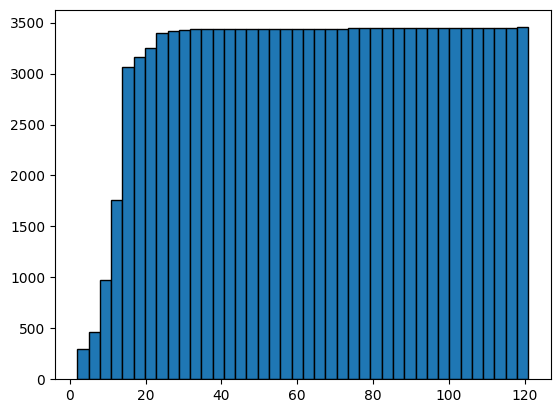

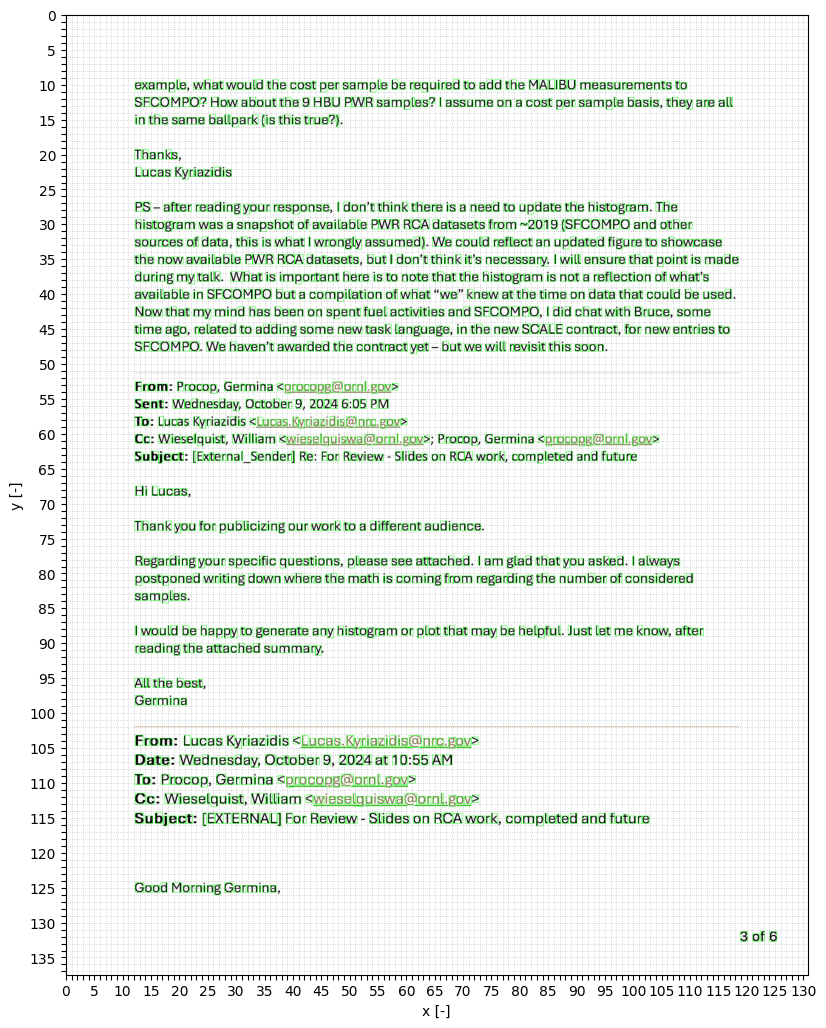

Result(image=<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3304x4109 at 0x3422F04D0>, figure=<Figure size 1000x1000 with 1 Axes>, _image=array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 25

In [14]:
import A_GIS
import matplotlib

image = A_GIS.Image.open(path="/Users/ww5/bin/selected.png")
#A_GIS.Image.show(image=image,wh_scale=[22,34])

binary = A_GIS.Image.create_binary(threshold=220,image=image).image
#A_GIS.Image.show(image=binary,cmap='gray',wh_scale=[22,34])

result = A_GIS.Image.get_character_scale(image=image,iterations=4,min_area=5,threshold=150)
wh_scale = [50,50]
matplotlib.pyplot.hist(result.widths, bins=40, cumulative=True,edgecolor='black')

#print(result.heights)
print('guess',result.wh_scales[-1])
#result.wh_scale
wh_scale = result.wh_scales[-1]
print('calculated',result.wh_scales)
print('assigned',wh_scale)
A_GIS.Image.show(image=result.debug_images[-1],
                 wh_scale=wh_scale,
                 nticks=1,
                 nlabels=5,
                 grid=True)

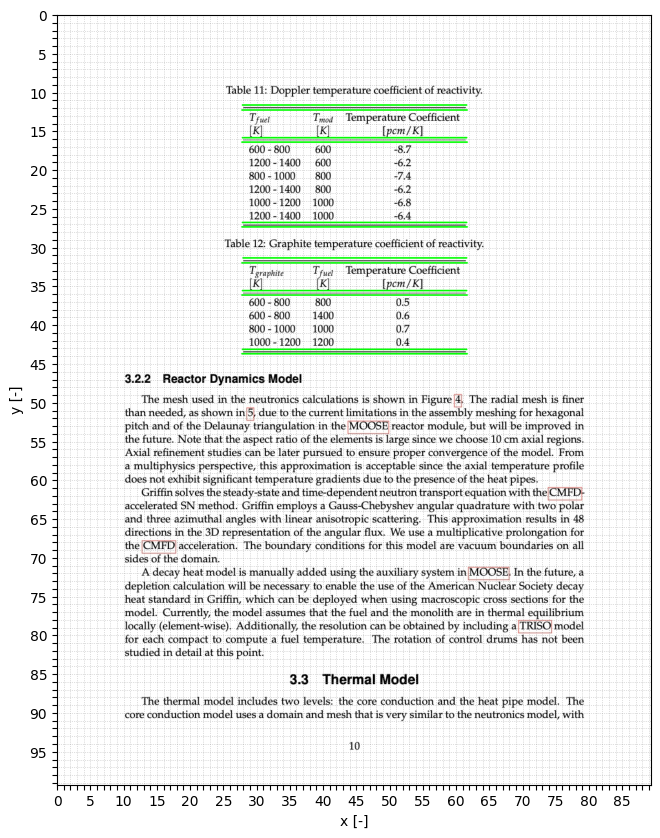

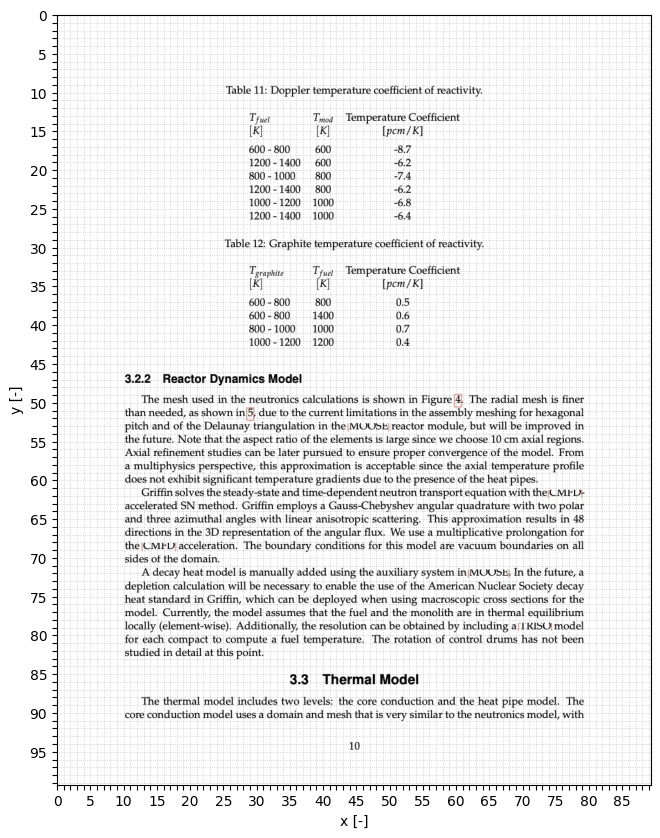

In [95]:
result=A_GIS.Image.find_lines(image=image,wh_scale=wh_scale,dilation_iterations=3)

A_GIS.Image.show(image=result.debug_image,
                 wh_scale=wh_scale,
                 nticks=1,
                 nlabels=5,
                 grid=True)
masked_image = A_GIS.Image.remove_by_mask(image=image,mask=result.lines_mask).image

A_GIS.Image.show(image=masked_image,
                 wh_scale=wh_scale,
                 nticks=1,
                 nlabels=5,
                 grid=True)


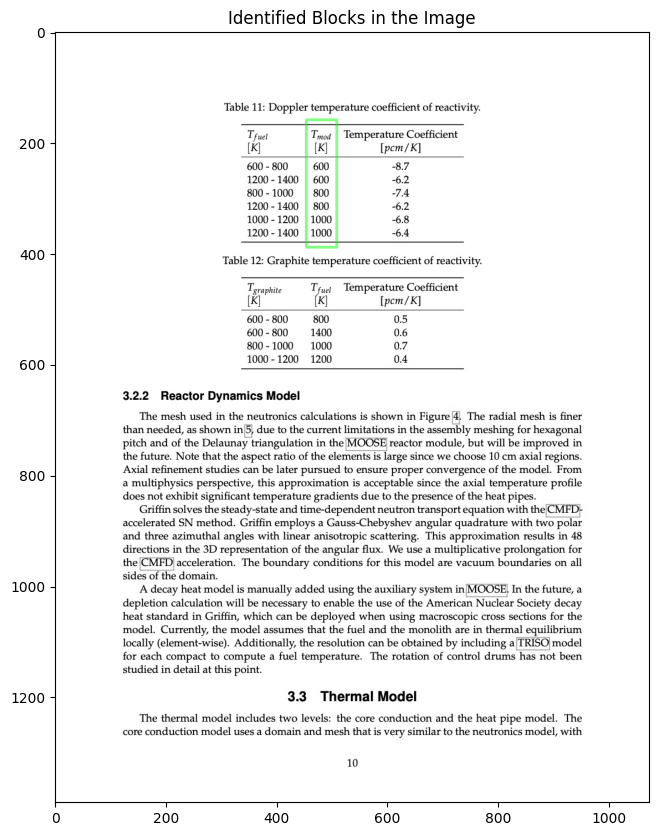

In [161]:
import A_GIS
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


# Scale the original image using the calculated factors
scaled_image = cv.resize(np.array(image.convert("L")), None, fx=1, fy=1, interpolation=cv.INTER_LINEAR)

# Thresholding to create a binary image
_, binary = cv.threshold(scaled_image, 220, 255, cv.THRESH_BINARY_INV)

# Morphological operations to enhance text regions
kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))
dilated = cv.dilate(binary, kernel, iterations=4)
#dilated = cv.erode(dilated, kernel, iterations=2)

# Find contours of text regions
contours, _ = cv.findContours(dilated, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Set up a list to hold bounding boxes of potential captions
caption_boxes = []

# Filter contours based on size to identify potential captions
for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    
    # Apply heuristics to identify "floating" text (e.g., table captions or figure captions)
    if w>3 and h>3:  # Adjust these values based on typical caption dimensions
        caption_boxes.append((x, y, w, h))

# Draw bounding boxes for potential captions on the original image
image_color = cv.cvtColor(scaled_image, cv.COLOR_GRAY2BGR)

# Create an overlay image to draw the transparent boxes
overlay = image_color.copy()

# Draw transparent rectangles on the overlay
for (x, y, w, h) in caption_boxes[-2:-1]:
    cv.rectangle(overlay, (x+125, y), (x + 180, y + h), (0, 255, 0), 3)  # Filled rectangle

# Blend the overlay with the original image to achieve transparency
alpha = 0.5  # Transparency factor (0 is fully transparent, 1 is fully opaque)
cv.addWeighted(overlay, alpha, image_color, 1 - alpha, 0, image_color)

# Display the results
plt.figure(figsize=(10, 10))
plt.title('Identified Blocks in the Image')
plt.imshow(cv.cvtColor(image_color, cv.COLOR_BGR2RGB))
plt.show()


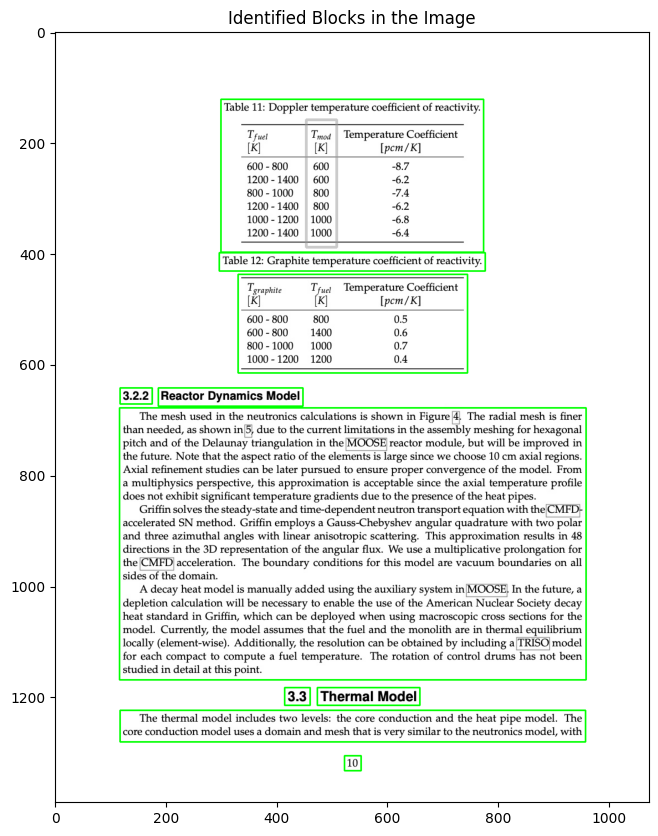

In [193]:
import A_GIS
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import PIL

# Thresholding to create a binary image
scaled_image = PIL.Image.fromarray(image_color).convert("L")
scaled_image = np.array(scaled_image)
_, binary = cv.threshold(scaled_image, 220, 255, cv.THRESH_BINARY_INV)

# Morphological operations to enhance text regions
kernel = cv.getStructuringElement(cv.MORPH_RECT, (5,5))
dilated = cv.dilate(binary, kernel, iterations=3)
#dilated = cv.erode(dilated, kernel, iterations=1)

# Find contours of text regions
contours, _ = cv.findContours(dilated, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Set up a list to hold bounding boxes of potential captions
caption_boxes = []

# Filter contours based on size to identify potential captions
for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    
    # Apply heuristics to identify "floating" text (e.g., table captions or figure captions)
    if w>3 and h>3:  # Adjust these values based on typical caption dimensions
        caption_boxes.append((x, y, w, h))

# Draw bounding boxes for potential captions on the original image
scaled_image = cv.cvtColor(scaled_image, cv.COLOR_GRAY2BGR)

# Draw transparent rectangles on the overlay
for (x, y, w, h) in caption_boxes:
    cv.rectangle(scaled_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
# Display the results
plt.figure(figsize=(10, 10))
plt.title('Identified Blocks in the Image')
plt.imshow(cv.cvtColor(scaled_image, cv.COLOR_BGR2RGB))
plt.show()

In [6]:
print(caption_boxes[1])
x, y, w, h = caption_boxes[0]
cropped_image = data[y:y+h, x:x+w]  # Crop the region using NumPy slicing

# Display the cropped image
plt.figure(figsize=(5, 5))
plt.imshow(cropped_image, cmap='gray')
plt.axis('off')
plt.show()

NameError: name 'caption_boxes' is not defined

In [203]:
import pytesseract
import PIL
image = PIL.Image.open('/Users/ww5/Downloads/eqn2.jpg')

import matplotlib.pyplot as plt
import sympy

# Configure Tesseract to use a specific language model
#config = r'--oem 1 -l eng --psm 7'
config = r'--oem 1 -l eng+equ+ell --psm 6'  # Assume a single uniform block of text
text = pytesseract.image_to_string(image, config="--oem 1 -l eng+equ --psm 11")
print(text)
from pix2tex.cli import LatexOCR
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=FutureWarning, message=".*torch.load.*")
    model = LatexOCR()    
    # Call the function that triggers the warning
    latex_code = model(image)

latex_code = r"\chi^{2}=\sum_{j=1}^{m}\left(\frac{y_{j}-\sum_{i=1}^{n}a_{i}\lambda_{i}e^{-\lambda_{i}t_{j}}}{\sigma_{j}}\right)^{3},"
print(latex_code)



\chi^{2}=\sum_{j=1}^{m}\left(\frac{y_{j}-\sum_{i=1}^{n}a_{i}\lambda_{i}e^{-\lambda_{i}t_{j}}}{\sigma_{j}}\right)^{3},


In [204]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

def latex_to_image(latex_str):
    """Renders a LaTeX string to an image file."""
    
    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(5, 3))  # Adjusted size for better readability
    ax.axis('off')
    
    # Render the LaTeX string with proper formatting
    ax.text(0.5, 0.5, f"$${latex_str}$$", fontsize=20, ha='center', va='center')

    # Save the figure to a file
    plt.savefig('/Users/ww5/Downloads/equation.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
    plt.close(fig)

# Example LaTeX usage
print(latex_code)
latex_to_image(latex_code)

image2 = PIL.Image.open('/Users/ww5/Downloads/equation.png')

\chi^{2}=\sum_{j=1}^{m}\left(\frac{y_{j}-\sum_{i=1}^{n}a_{i}\lambda_{i}e^{-\lambda_{i}t_{j}}}{\sigma_{j}}\right)^{3},


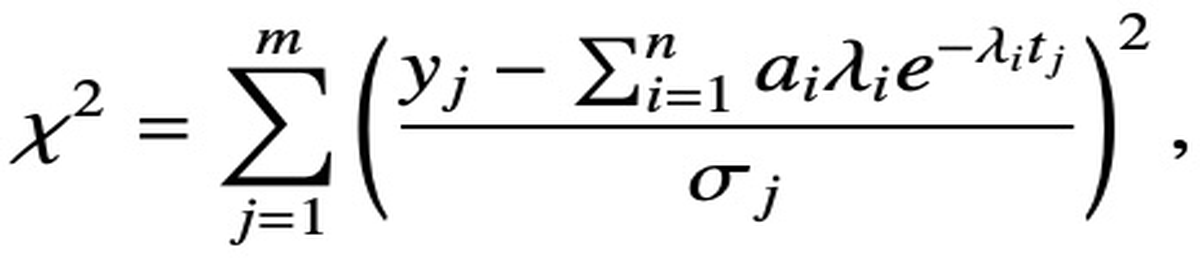

In [205]:
import numpy as np
from PIL import Image, ImageChops

import numpy as np
from PIL import Image

def trim_image(image):
    """Trim the excess padding or margins from the image based on content."""
    # Convert the image to grayscale and NumPy array
    image_gray = image.convert("L")  # Convert to grayscale
    image_array = np.array(image_gray)
    
    # Create a binary mask where non-white (content) pixels are 1
    # Assumption: The background is white (255 in grayscale)
    mask = image_array < 255

    # Find the bounding box of non-zero regions in the mask
    coords = np.argwhere(mask)

    if coords.any():
        # Get the min and max points for x and y to define the bounding box
        x0, y0 = coords.min(axis=0)
        x1, y1 = coords.max(axis=0) + 1  # Add 1 because slicing is non-inclusive

        # Crop the image to the bounding box
        cropped_image = image.crop((y0, x0, y1, x1))
        return cropped_image
    else:
        # If the image is completely empty (all white), return the original image
        return image

# Trim both images to remove padding/margin
trimmed_image1 = trim_image(image)
trimmed_image2 = trim_image(image2)

def resize_images(image1, image2):
    """Resize both images to the same size."""
    # Get the size of the largest image
    width = max(image1.width, image2.width)
    height = max(image1.height, image2.height)

    # Resize both images to the same dimensions
    image1_resized = image1.resize((width, height), Image.Resampling.LANCZOS)
    image2_resized = image2.resize((width, height), Image.Resampling.LANCZOS)

    return image1_resized, image2_resized

# Resize the images to match their dimensions
image1_resized, image2_resized = resize_images(trimmed_image1, trimmed_image2)
image1_resized

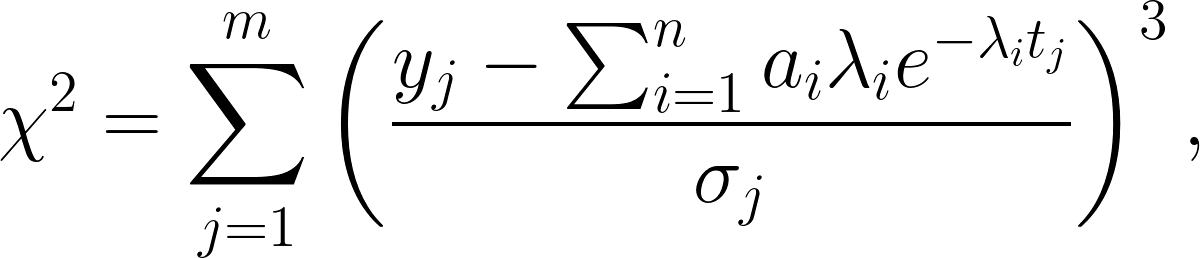

In [206]:
import cv2
import numpy as np

def align_images(image1, image2):
    # Convert to grayscale
    img1_gray = np.array(image1.convert('L'))
    img2_gray = np.array(image2.convert('L'))

    # Detect ORB keypoints and descriptors
    orb = cv2.ORB_create()
    keypoints1, descriptors1 = orb.detectAndCompute(img1_gray, None)
    keypoints2, descriptors2 = orb.detectAndCompute(img2_gray, None)

    # Match the keypoints using BFMatcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)

    # Sort matches based on their distance
    matches = sorted(matches, key=lambda x: x.distance)

    # Extract the matched keypoints
    points1 = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    points2 = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    # Compute the homography matrix and align the images
    matrix, _ = cv2.findHomography(points1, points2, cv2.RANSAC, 5.0)
    aligned_img2 = cv2.warpPerspective(np.array(image2), matrix, (image1.width, image1.height))

    return Image.fromarray(aligned_img2)

# Align the images
#image2_resized = align_images(image1_resized, image2_resized)
image2_resized
# Now, you can perform SSIM or contour comparison on the aligned images

In [207]:
import torch
from PIL import Image
from transformers import CLIPProcessor, CLIPModel

def clip_image_diff(image1, image2):
    # Load CLIP model and processor
    model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
    processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

    # Process images into embeddings
    inputs1 = processor(images=image1, return_tensors="pt")
    inputs2 = processor(images=image2, return_tensors="pt")

    with torch.no_grad():
        # Generate image embeddings
        image_embeds1 = model.get_image_features(**inputs1)
        image_embeds2 = model.get_image_features(**inputs2)

    # Normalize the embeddings
    image_embeds1 /= image_embeds1.norm(dim=-1, keepdim=True)
    image_embeds2 /= image_embeds2.norm(dim=-1, keepdim=True)

    # Compute cosine similarity
    similarity = torch.nn.functional.cosine_similarity(image_embeds1, image_embeds2)
    
    return similarity.item()

# Compare the images
similarity = clip_image_diff(image1_resized, image2_resized)
print(f"Similarity between images: {similarity:.4f} (0.9658 2->3)")


/Users/ww5/a-gis/venv/lib/python3.11/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Similarity between images: 0.9658 (0.9658 2->3)


In [208]:
from transformers import ViTFeatureExtractor, ViTModel
from PIL import Image
import torch

# Initialize ViT model and feature extractor
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = ViTModel.from_pretrained('google/vit-base-patch16-224')

def get_image_embedding(image):
    # Load image
    image = image.convert("RGB")
    
    # Extract features
    inputs = feature_extractor(images=image, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Get image embedding (CLS token)
    embedding = outputs.last_hidden_state[:, 0, :]
    return embedding

# Get embeddings for both images
embedding1 = get_image_embedding(image1_resized)
embedding2 = get_image_embedding(image2_resized)

# Compare embeddings (Cosine Similarity)
cos_sim = torch.nn.functional.cosine_similarity(embedding1, embedding2)
print(f"Cosine Similarity: {cos_sim.item()} (0.8857 2->3)")

# Check if similarity is low
if cos_sim.item() < 0.99:
    print("Images differ. Potential issues with LaTeX extraction.")

/Users/ww5/a-gis/venv/lib/python3.11/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.8856753706932068 (0.8857 2->3)
Images differ. Potential issues with LaTeX extraction.


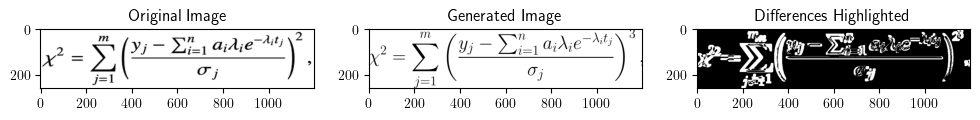

SSIM score: 0.7474280591604716 (0.7474 2->3)
Images differ. Check the difference map for highlighted areas.


In [209]:
import numpy as np
import cv2
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
from PIL import Image

def compare_images_with_ssim(image1, image2):
    # Convert PIL images to NumPy arrays (grayscale for SSIM)
    img1 = np.array(image1.convert('L'))
    img2 = np.array(image2.convert('L'))

    # Compute SSIM between the two images and get the difference map
    score, diff = ssim(img1, img2, full=True)
    diff = (diff * 255).astype("uint8")

    # Threshold the difference map to highlight regions of significant difference
    _, thresh = cv2.threshold(diff, 50, 255, cv2.THRESH_BINARY_INV)

    # Visualize the original images and the difference map
    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    ax[0].imshow(img1, cmap='gray')
    ax[0].set_title('Original Image')

    ax[1].imshow(img2, cmap='gray')
    ax[1].set_title('Generated Image')

    ax[2].imshow(thresh, cmap='gray')
    ax[2].set_title('Differences Highlighted')

    plt.show()

    return score, diff, thresh

# Compare the two PIL images and visualize the differences
ssim_score, diff_map, thresh_map = compare_images_with_ssim(image1_resized, image2_resized)
print(f"SSIM score: {ssim_score} (0.7474 2->3)")

if ssim_score < 0.99:
    print("Images differ. Check the difference map for highlighted areas.")


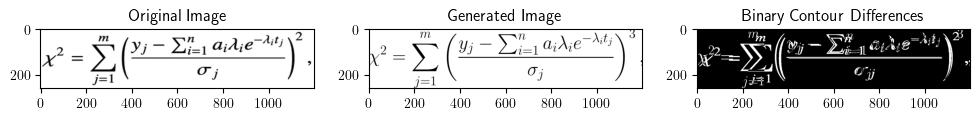

In [223]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contour_binary_difference(image1, image2):
    # Convert PIL images to NumPy arrays (grayscale for contour detection)
    img1 = np.array(image1.convert('L'))
    img2 = np.array(image2.convert('L'))

    # Apply binary thresholding to create binary images for contours
    _, thresh1 = cv2.threshold(img1, 128, 255, cv2.THRESH_BINARY_INV)
    _, thresh2 = cv2.threshold(img2, 128, 255, cv2.THRESH_BINARY_INV)

    # Calculate the absolute difference between the two thresholded images
    binary_diff = cv2.absdiff(thresh1, thresh2)

    # Apply binary thresholding to create a clean binary difference image
    _, binary_diff_thresh = cv2.threshold(binary_diff, 50, 255, cv2.THRESH_BINARY)

    # Visualize the original images and the binary contour differences
    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    ax[0].imshow(img1, cmap='gray')
    ax[0].set_title('Original Image')

    ax[1].imshow(img2, cmap='gray')
    ax[1].set_title('Generated Image')

    ax[2].imshow(binary_diff_thresh, cmap='gray')
    ax[2].set_title('Binary Contour Differences')

    plt.show()

# Compare the two PIL images using binary contour comparison
contour_binary_difference(image1_resized, image2_resized)


In [228]:
import cv2
import numpy as np
from PIL import Image

def segment_symbols(image):
    """Segment symbols in the mathematical image by finding contours."""
    img = np.array(image.convert('L'))  # Convert to grayscale
    _, binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)

    # Find contours of each symbol
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Extract bounding boxes around each contour (each symbol)
    symbols = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        symbol = img[y:y+h, x:x+w]
        symbols.append(symbol)
    
    return symbols

# Segment the symbols from the original and rendered images
original_symbols = segment_symbols(image1_resized)
rendered_symbols = segment_symbols(image2_resized)

In [230]:
from skimage.metrics import structural_similarity as ssim
import cv2

def resize_symbol(symbol1, symbol2):
    """Resize both symbols to at least 7x7 dimensions."""
    h1, w1 = symbol1.shape
    h2, w2 = symbol2.shape

    # Ensure both symbols are at least 7x7
    target_height = max(max(h1, h2), 7)
    target_width = max(max(w1, w2), 7)

    # Resize both symbols to the target size
    symbol1_resized = cv2.resize(symbol1, (target_width, target_height), interpolation=cv2.INTER_AREA)
    symbol2_resized = cv2.resize(symbol2, (target_width, target_height), interpolation=cv2.INTER_AREA)

    return symbol1_resized, symbol2_resized

def compare_single_symbol(symbol1, symbol2):
    """Compare two symbols using SSIM, after resizing them to the same dimensions."""
    # Resize symbols to ensure minimum size
    symbol1_resized, symbol2_resized = resize_symbol(symbol1, symbol2)

    # Dynamically adjust the window size for SSIM to fit smaller images
    min_dim = min(symbol1_resized.shape)
    win_size = min(7, min_dim)  # Use the smaller dimension for SSIM's window size

    # Compute SSIM between the resized symbols
    ssim_value, _ = ssim(symbol1_resized, symbol2_resized, win_size=win_size, full=True)
    return ssim_value

def compare_symbols(original_symbols, rendered_symbols):
    """Compare symbols between two sets of segmented symbols."""
    if len(original_symbols) != len(rendered_symbols):
        return "Mismatch in the number of symbols detected."

    feedback = []
    for i, (orig, rend) in enumerate(zip(original_symbols, rendered_symbols)):
        # Use SSIM or a simple pixel comparison for each symbol
        ssim_score = compare_single_symbol(orig, rend)  # Replace with your comparison logic

        if ssim_score < 0.95:
            feedback.append(f"Symbol {i+1} differs.")
    
    if feedback:
        return "\n".join(feedback)
    else:
        return "All symbols match."

# Get the comparison result and feedback
feedback = compare_symbols(original_symbols, rendered_symbols)
print(feedback)


Symbol 1 differs.
Symbol 2 differs.
Symbol 3 differs.
Symbol 4 differs.
Symbol 5 differs.
Symbol 6 differs.
Symbol 7 differs.
Symbol 8 differs.
Symbol 9 differs.
Symbol 10 differs.
Symbol 11 differs.
Symbol 12 differs.
Symbol 13 differs.
Symbol 14 differs.
Symbol 15 differs.
Symbol 16 differs.
Symbol 17 differs.
Symbol 18 differs.
Symbol 19 differs.
Symbol 20 differs.
Symbol 21 differs.
Symbol 22 differs.
Symbol 23 differs.
Symbol 24 differs.
Symbol 25 differs.
Symbol 26 differs.
Symbol 27 differs.
Symbol 28 differs.
Symbol 29 differs.
Symbol 30 differs.
Symbol 31 differs.
Symbol 32 differs.
Symbol 33 differs.
Symbol 34 differs.
Symbol 35 differs.
Symbol 36 differs.
Symbol 37 differs.
Symbol 38 differs.
Symbol 39 differs.
Symbol 40 differs.
Symbol 41 differs.
Symbol 42 differs.
Symbol 43 differs.
Symbol 44 differs.
